# Example Strategy/Backtest

#### Imports

In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 
import tabulate
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import analytics.tears as tears
from IPython.display import display
from Queue import Queue
from utils.stock import Stock
from stock_backtest.data_handler import StockBacktestDataHandler
from stock_backtest.execution_handler import StockBacktestExecutionHandler
from stock_backtest.backtest import StockBacktest
from strategies.buy_strategy import BuyStrategy
import analytics.plotting as plot
from analytics.plotting import plot_holdings

## Run the backtest 

In [2]:
events = Queue()
products = [Stock('MSFT'), Stock('ORCL')]
symbols = [product.symbol for product in products]
start_date = dt.datetime(year=2012, month=1, day=1)
end_date = dt.datetime(year=2016, month=1, day=10)
data = StockBacktestDataHandler(events, symbols, start_date, end_date)
execution = StockBacktestExecutionHandler(events)
strategy = BuyStrategy(events, data, products, initial_cash=100000)
backtest = StockBacktest(events, strategy, data, execution, start_date, end_date)
backtest.run()

Running backtest with params:{'START': '1/1/2012 00:00', 'EXECUTION': 'StockBacktestExecutionHandler', 'END': '1/10/2016 00:00', 'STRATEGY': 'BuyStrategy'}


Entire data start date: 2012-01-03
Entire data end date: 2016-01-08


Backtest Months: 48


Performance statistics,Backtest
annual_return,0.10
annual_volatility,0.15
sharpe_ratio,0.71
calmar_ratio,0.66
stability_of_timeseries,0.91
max_drawdown,-0.15
omega_ratio,1.16
sortino_ratio,1.06
skew,-0.21
kurtosis,25.38


Worst Drawdown Periods,net drawdown in %,peak date,valley date,recovery date,duration
0,15.49,2015-05-15,2015-08-24,2015-10-23,116
1,13.64,2014-11-14,2015-02-02,2015-04-28,118
3,7.84,2014-09-22,2014-10-16,2014-11-04,32
2,6.68,2015-12-30,2016-01-08,NaT,NaN
4,5.97,2012-03-16,2012-12-05,2013-05-17,306




[-0.019 -0.038]


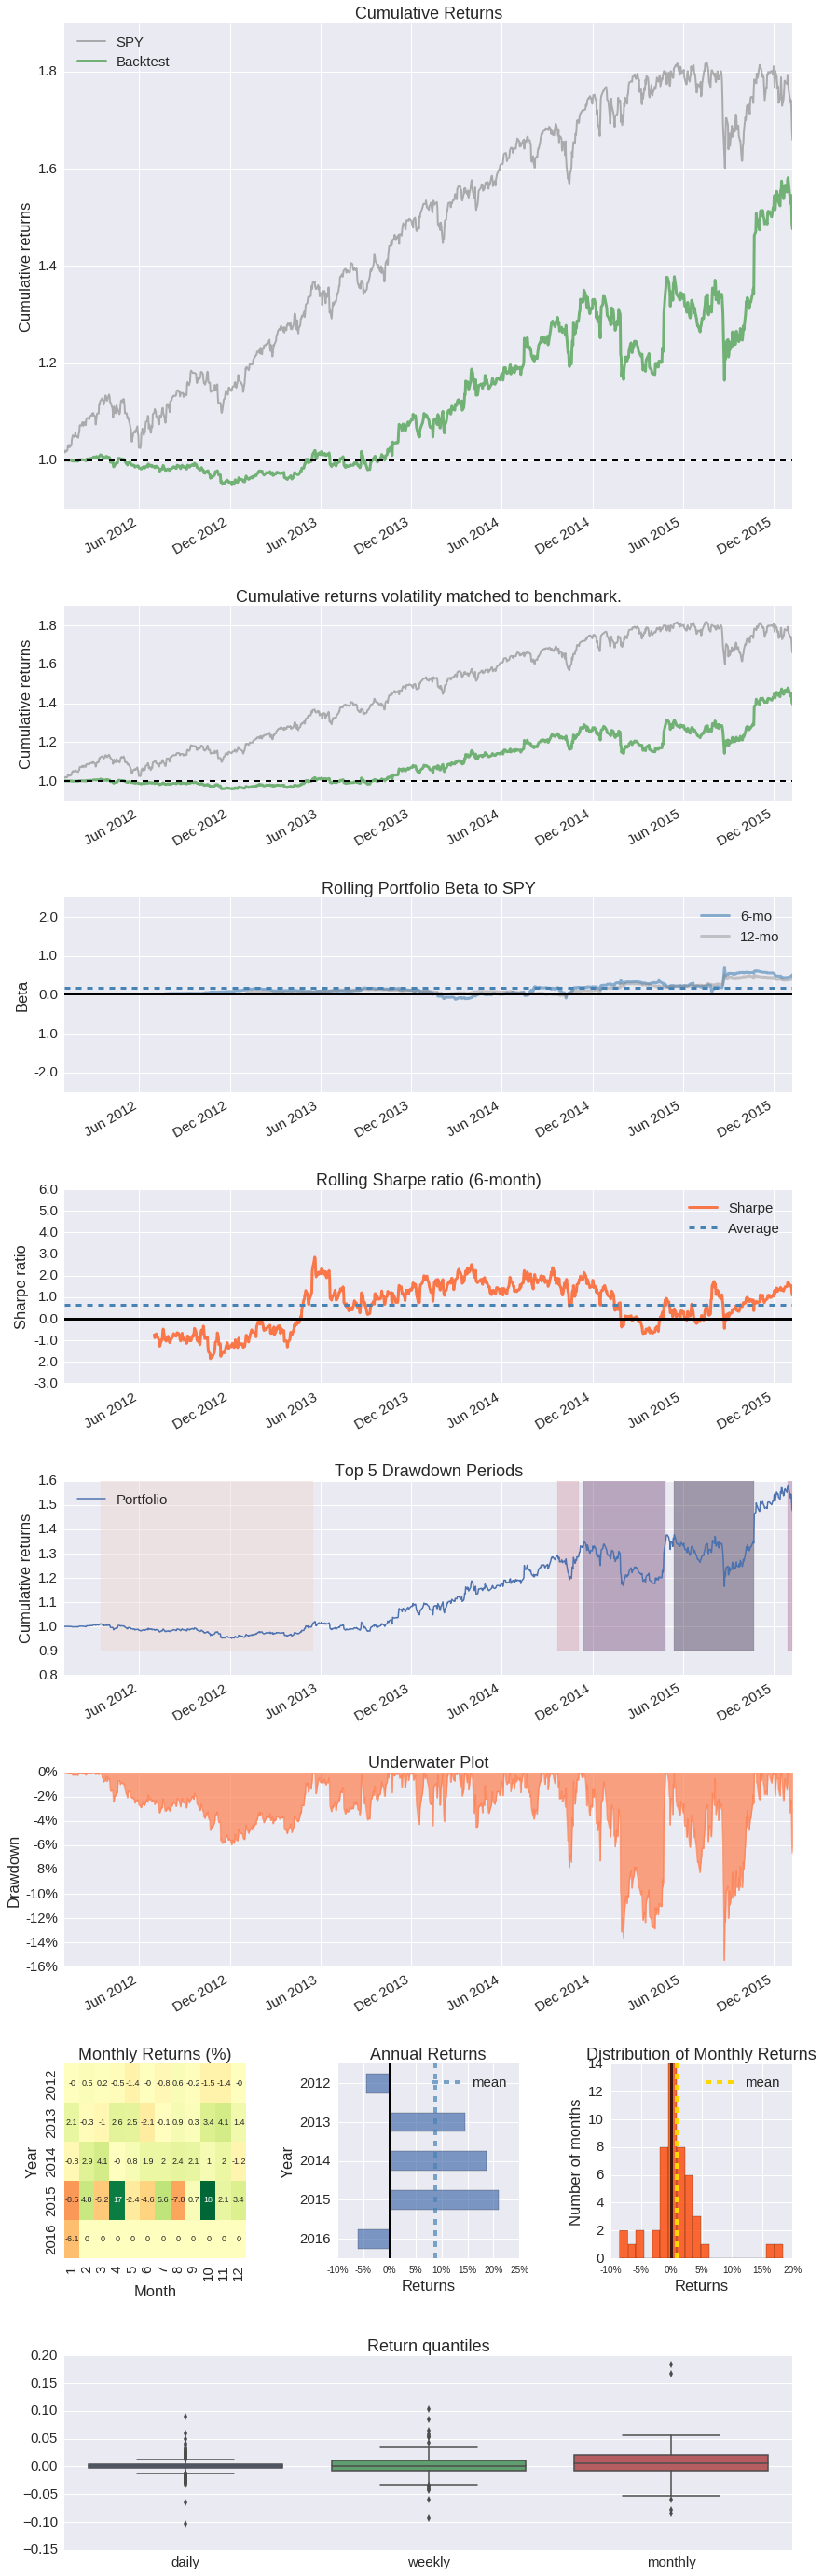

In [4]:
# print tabulate.tabulate(strategy.time_series, headers='keys', tablefmt='pipe')
# holdings_fig = plt.figure()
# for i in range(len(symbols)):
#     symbol = symbols[i]
#     positions = pd.DataFrame(data=np.array([strategy.time_series[symbol+'_val'], strategy.time_series['cash']]).transpose(),
#                              index=strategy.time_series.index,
#                              columns=[symbol, 'cash'])
#     ax = holdings_fig.add_subplot(len(symbols), 1, i+1)
#     plot_holdings(strategy.time_series['returns'], positions, ax=ax)
# plt.ioff()
# positions_cols = [product.symbol+'_val' for product in products] + ['cash']
# positions = pd.DataFrame(np.array([strategy.time_series[product.symbol+'_val'] for product in products]
#                          + [strategy.time_series['cash']]).transpose(), columns=positions_cols,
#                          index=strategy.time_series.index)
# positions_tear = tears.create_position_tear_sheet(strategy.time_series['returns'], positions, return_fig=True)
returns_tear = tears.create_returns_tear_sheet(strategy.time_series['returns'], return_fig=True)